# Library

In [197]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import datetime

import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# model
import lightgbm as lgb

# shap
import shap

# my_tool
import sys
sys.path.append('../../')
import importlib
from utils import my_ds_tools as mdt
importlib.reload(mdt)

<module 'utils.my_ds_tools' from '../../utils/my_ds_tools.py'>

# Config

In [211]:
VERSION = 'v1'
USAGE = 'tree'
INPUT_DIR = '../intermediate/'

Y_COL = 'SalePrice'
DROP_COLS = ['Id']

# Load data

In [212]:
train_df = pd.read_csv(INPUT_DIR + 'train_for_' + USAGE + '_' + VERSION + '.csv')
test_df = pd.read_csv(INPUT_DIR + 'test_for_' + USAGE + '_' + VERSION + '.csv')

# Preprocess

In [309]:
feature_cols = [
#     'Unnamed: 0', 
#     'Id', 
#     'MSSubClass', 
    'MSZoning', 
#     'LotFrontage',
#     'LotArea',
    'Street',
    'Alley',
    'LotShape',
    'LandContour',
    'Utilities',
    'LotConfig',
    'LandSlope',
    'Neighborhood',
    'Condition1',
    'Condition2',
    'BldgType',
    'HouseStyle',
#     'OverallQual',
#     'OverallCond',
#     'YearBuilt',
#     'YearRemodAdd',
    'RoofStyle',
    'RoofMatl',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'MasVnrArea',
    'ExterQual',
    'ExterCond',
    'Foundation',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinSF1',
    'BsmtFinType2',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'Heating',
    'HeatingQC',
    'CentralAir',
    'Electrical',
#     '1stFlrSF',
    '2ndFlrSF',
    'LowQualFinSF',
    'GrLivArea',
    'BsmtFullBath',
    'BsmtHalfBath',
    'FullBath',
    'HalfBath',
    'BedroomAbvGr',
    'KitchenAbvGr',
    'KitchenQual',
#     'TotRmsAbvGrd',
    'Functional',
    'Fireplaces',
    'FireplaceQu',
    'GarageType',
    'GarageYrBlt',
    'GarageFinish',
    'GarageCars',
    'GarageArea',
    'GarageQual',
    'GarageCond',
    'PavedDrive',
    'WoodDeckSF',
    'OpenPorchSF',
    'EnclosedPorch',
    '3SsnPorch',
    'ScreenPorch',
    'PoolArea',
    'PoolQC',
    'Fence',
    'MiscFeature',
    'MiscVal',
#     'MoSold',
#     'YrSold',
#     'SaleType',
    'SaleCondition',
    'FixedMSSubClass',
    'FixedOverallQual',
    'FixedOverallCond',
    'LogLotArea',
    'LogFrontage',
    'IsRemod',
    'PastYears',
#     'SalePrice'
]
# train_df.columns

In [310]:
x = train_df.loc[:, feature_cols]
y = train_df.loc[:, Y_COL]

In [311]:
prepro_tool = mdt.DS_PREPROCESS(x, y)

In [312]:
prepro_tool.show_desc_features()

Categorical
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleCondition']
Numerical
['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'FixedMSSubClass', 'FixedOverallQual', 'FixedOverallCond

In [313]:
prepro_x = prepro_tool.label_encode_x()
prepro_tool.check_null_x(prepro_x)

MSZoning               0
Street                 0
Alley                  0
LotShape               0
LandContour            0
Utilities              0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             8
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0
CentralAir             0
Electrical             0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           0
BsmtHalfBath           0


In [314]:
prepro_y = np.log(y)
prepro_y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [317]:
x_train, x_test, y_train, y_test = train_test_split(prepro_x, prepro_y)

# Calculate Model

In [319]:
model_tool = mdt.DS_MODEL()
model_list = [
    'lgb',
#     'dt',
#     'rf',
]
for m in model_list:
    print(m)
#     model_tool.reg_fit_predict(x_train, x_test, y_train, y_test, m)
    model_tool.reg_fit_predict_cv(m, prepro_x, prepro_y)
    print('------------------------------------')

lgb
mae: 0.0910
mae_mean: 0.0076
rmse: 0.1327
rmse_mean: 0.0110
------------------------------------


# EDA by SHAP

In [283]:
models = model_tool.get_estimators('regression')

In [284]:
shap_tool = mdt.DS_SHAP(models['lgb'], x_train)

KeyError: 'lgb'

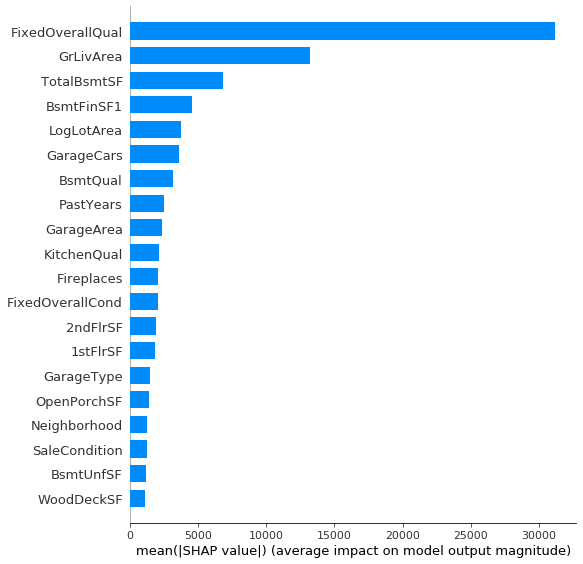

In [264]:
shap_tool.show_summary_plot()

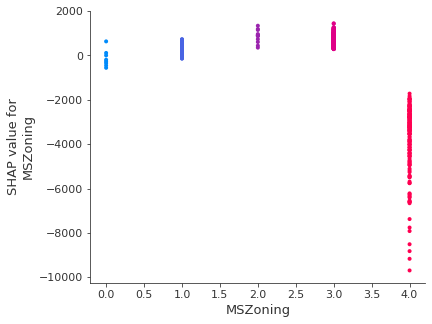

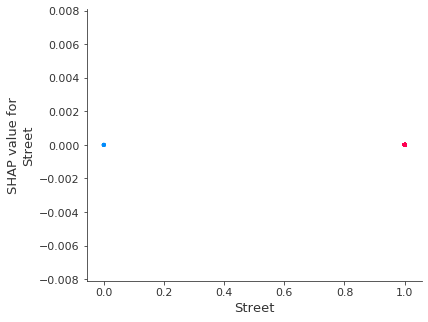

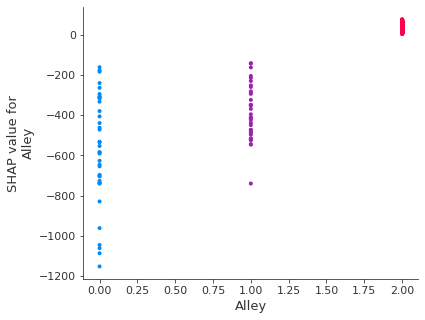

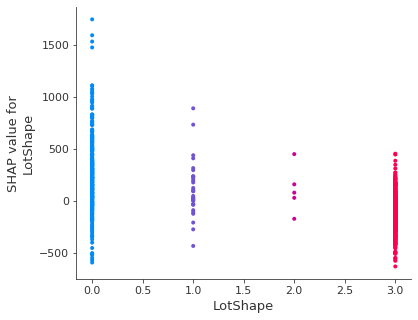

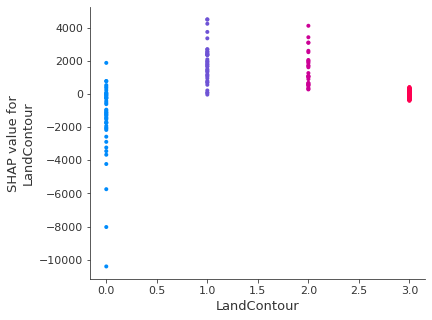

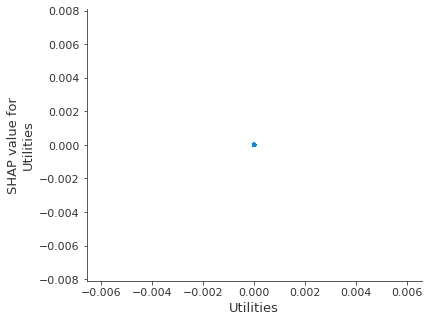

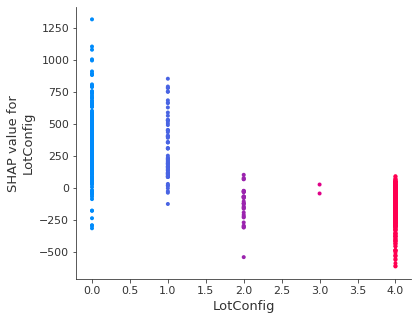

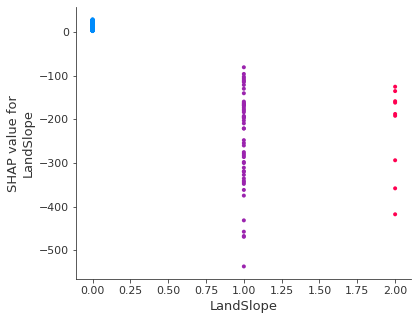

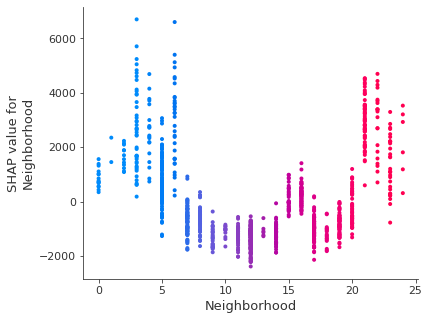

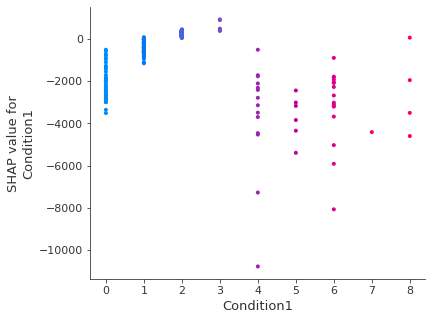

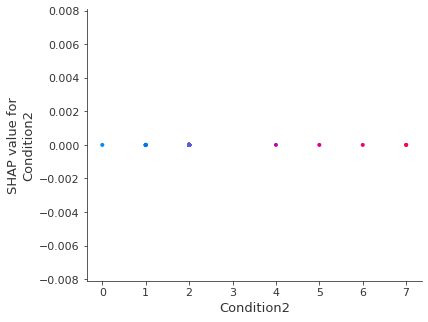

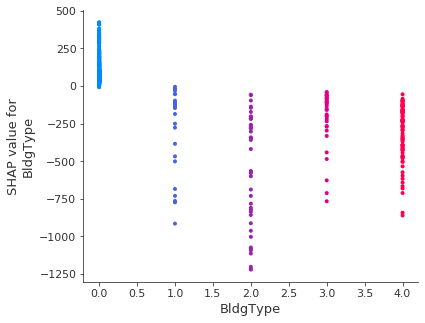

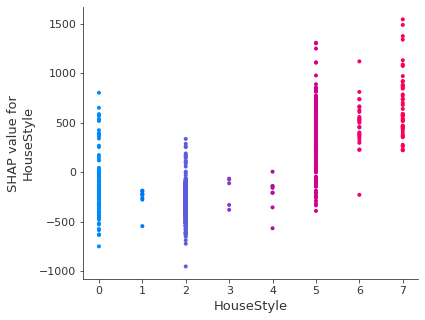

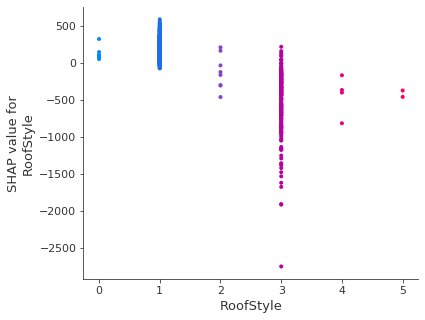

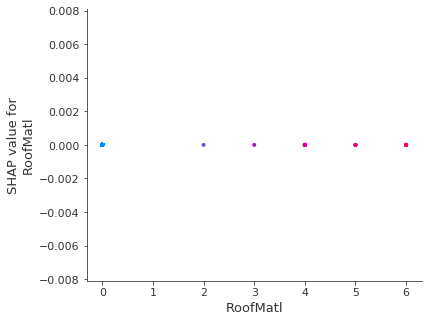

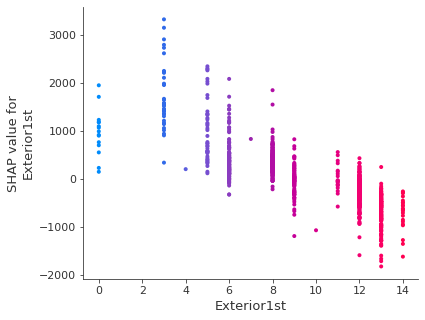

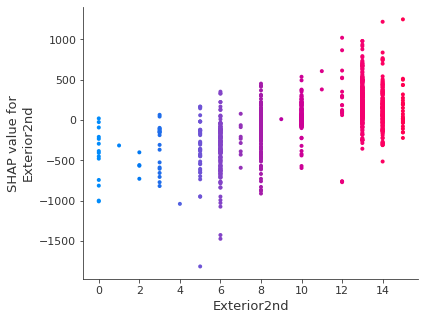

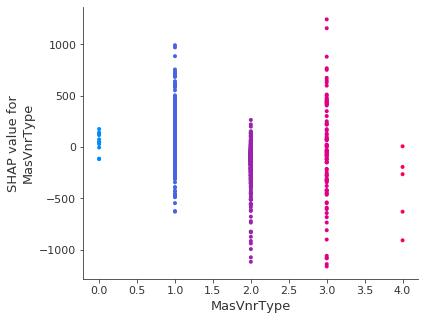

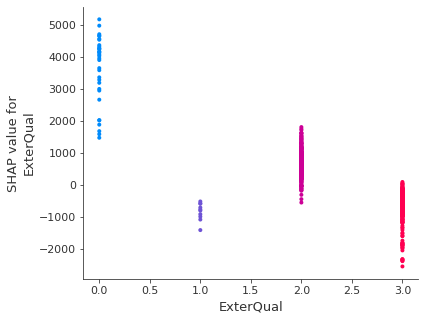

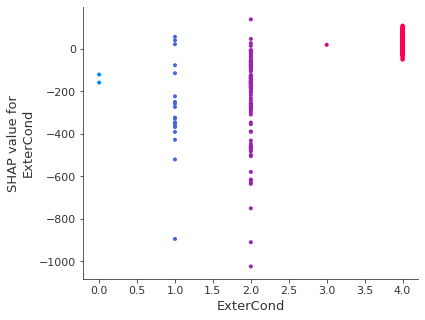

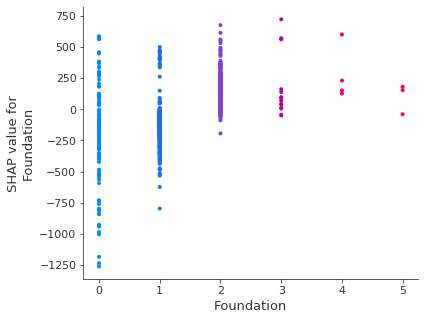

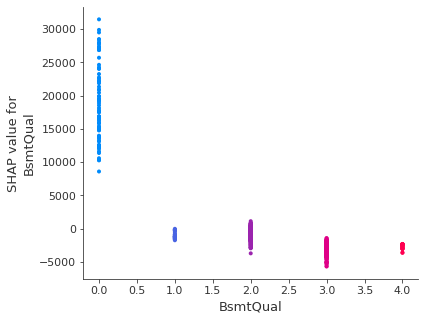

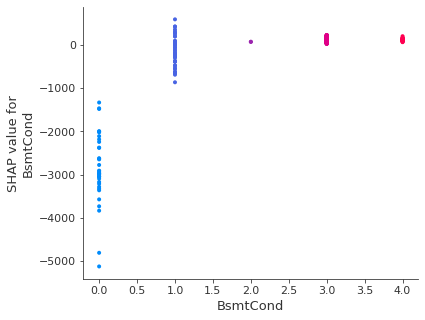

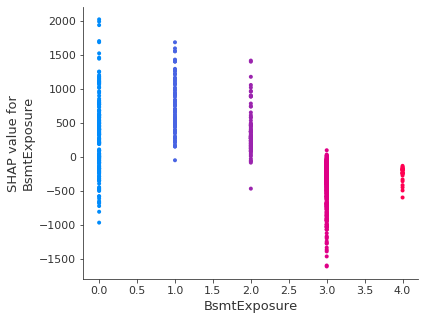

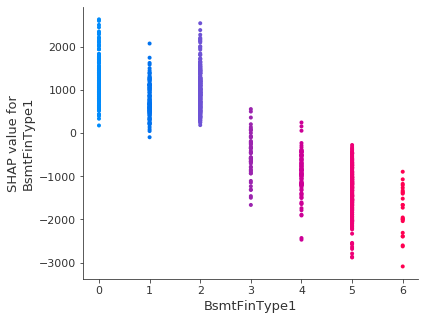

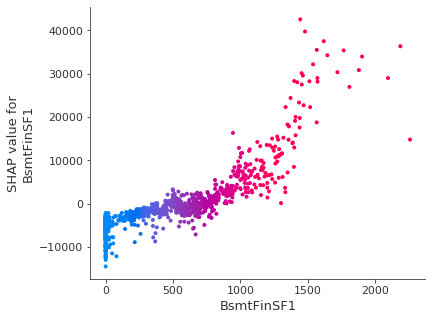

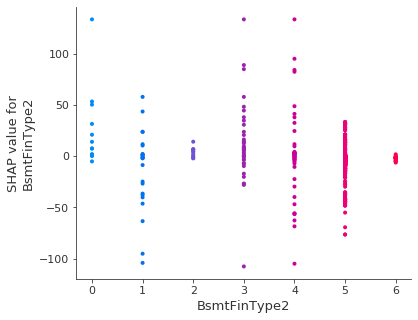

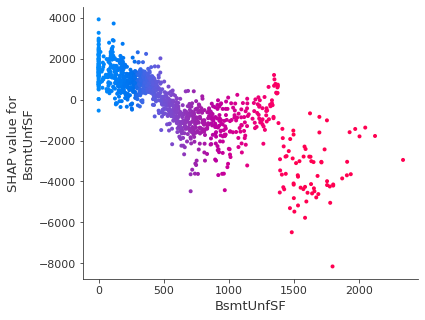

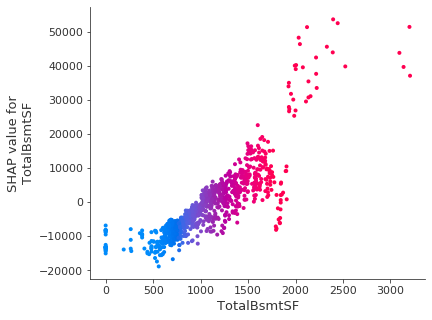

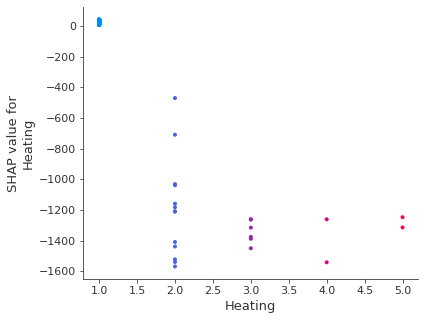

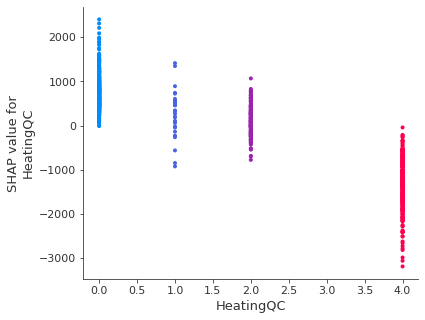

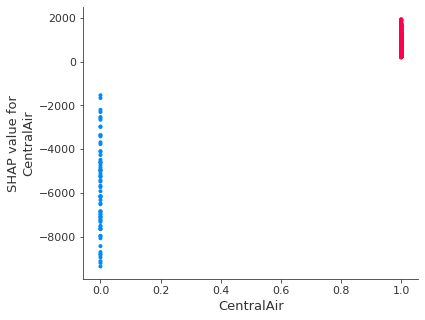

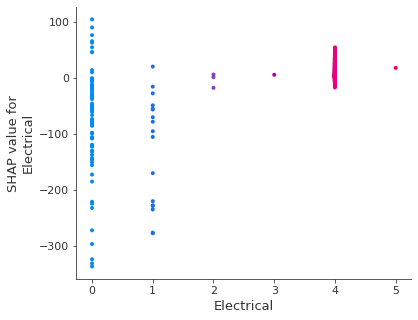

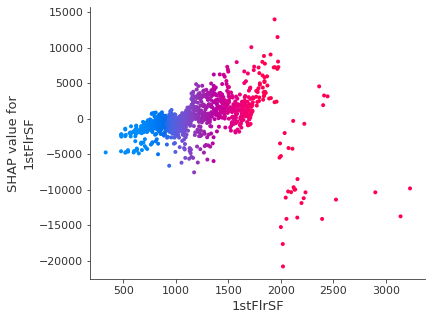

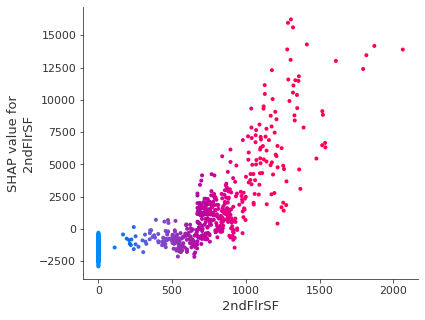

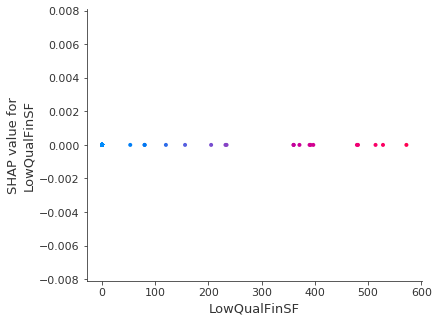

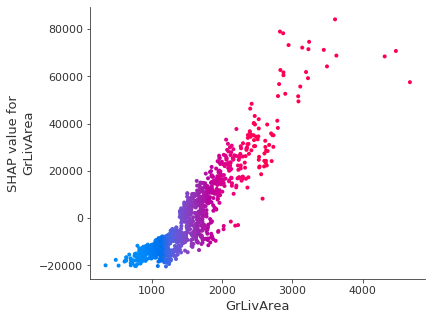

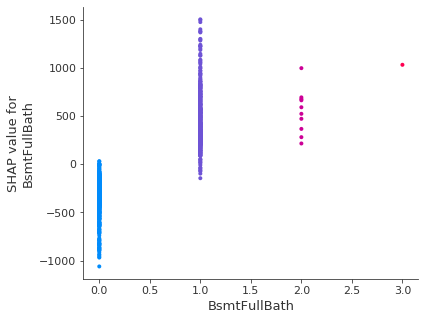

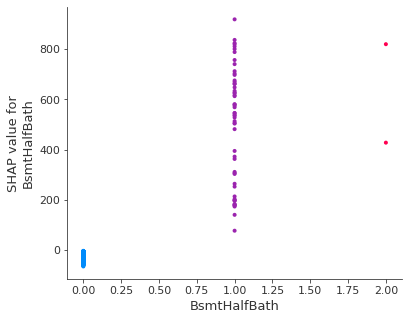

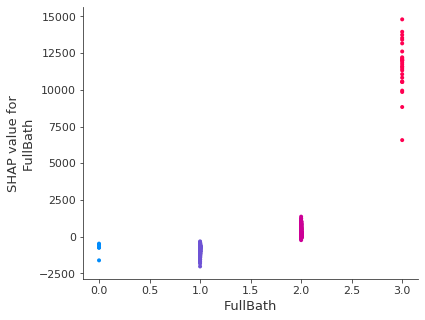

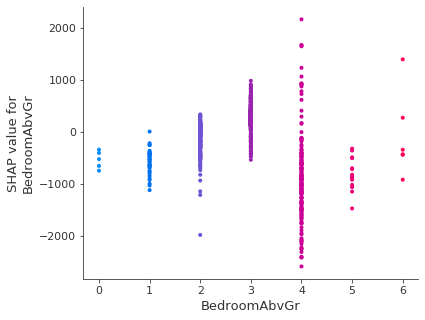

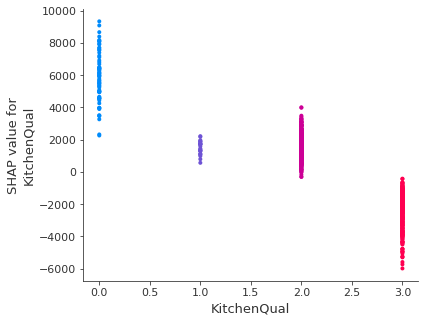

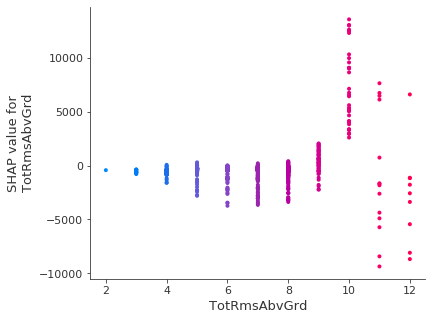

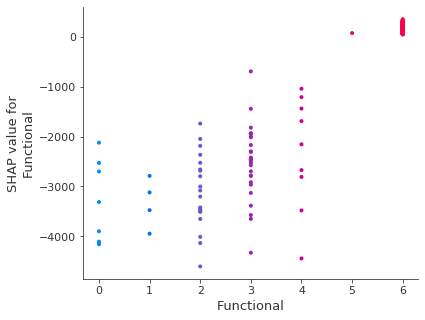

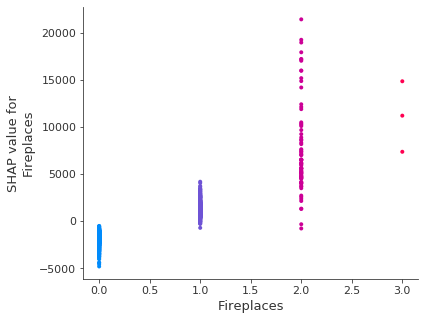

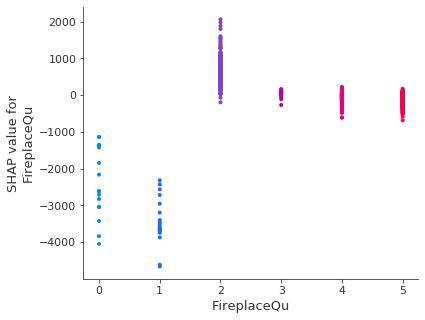

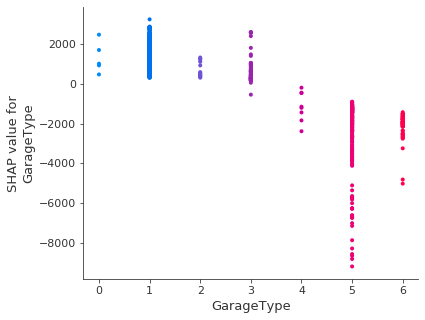

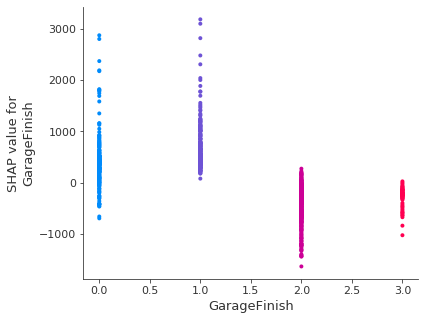

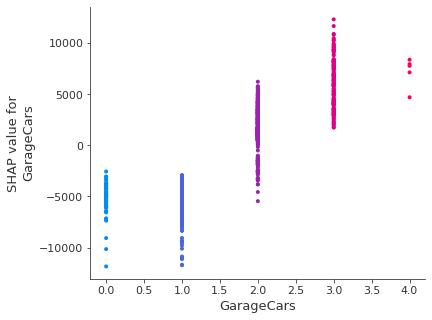

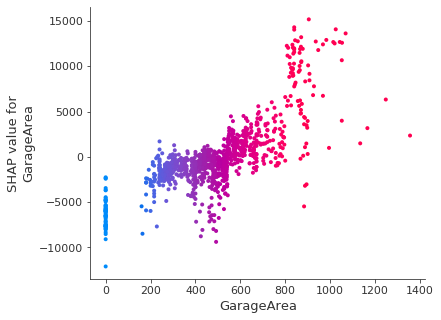

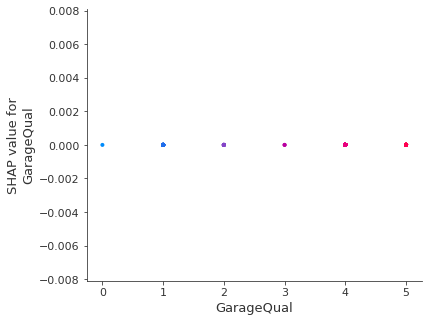

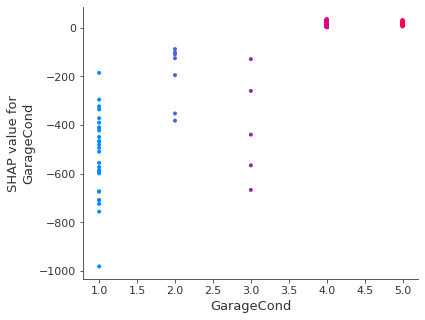

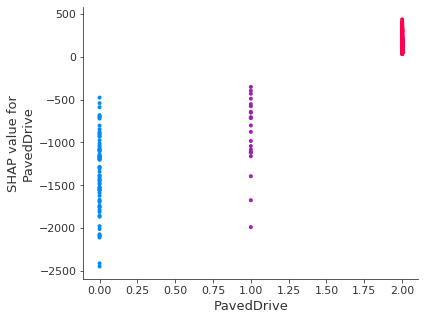

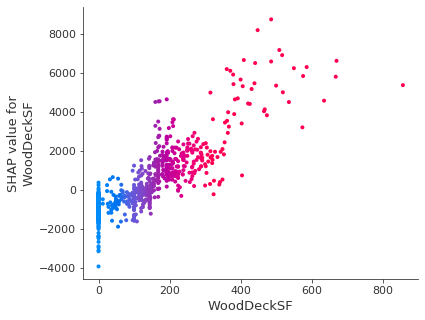

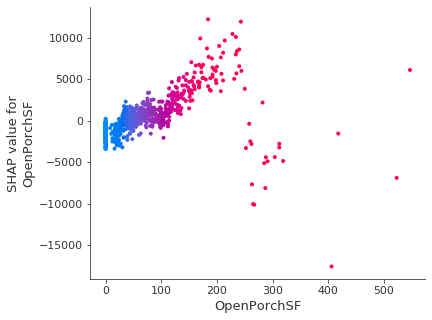

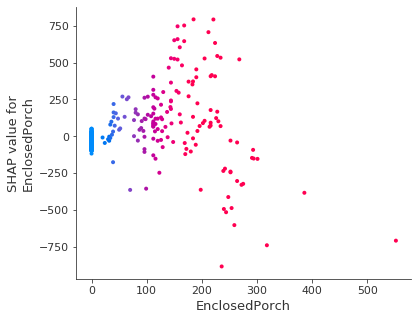

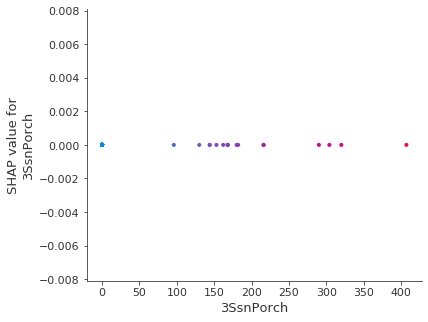

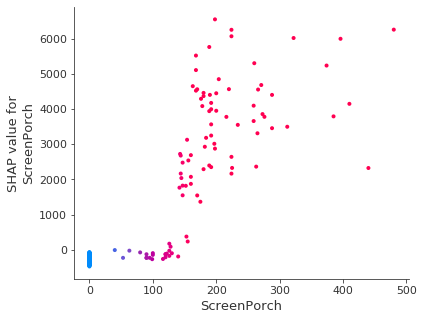

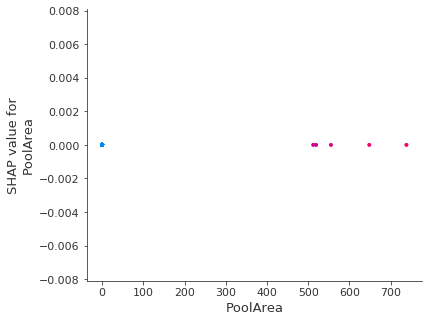

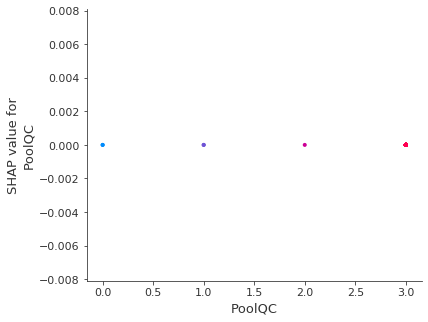

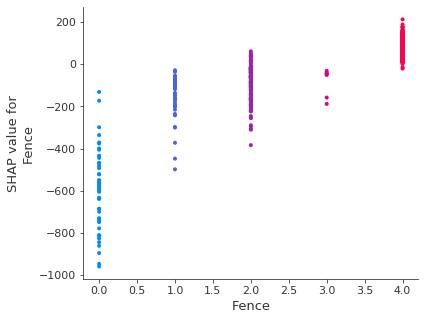

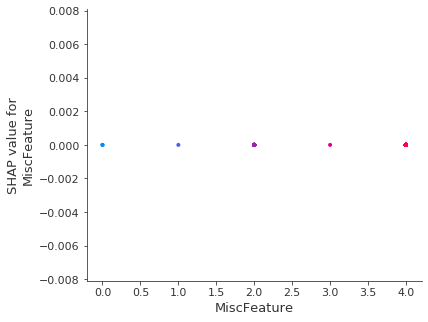

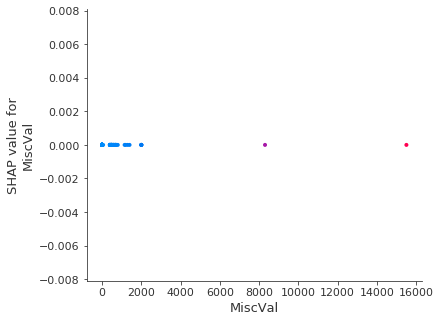

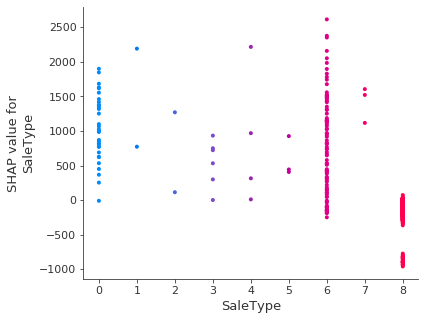

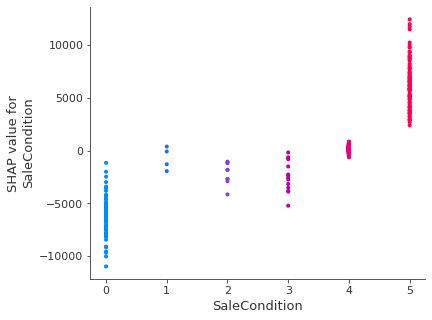

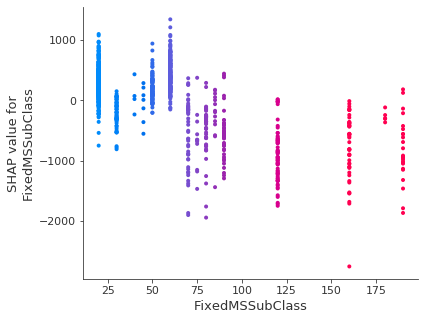

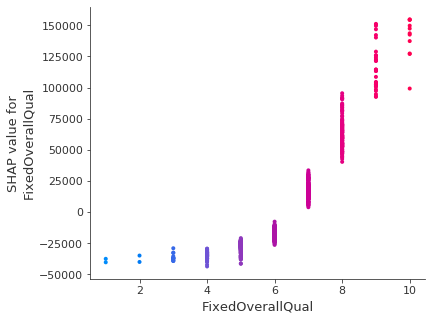

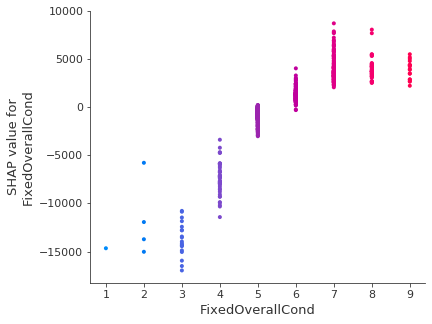

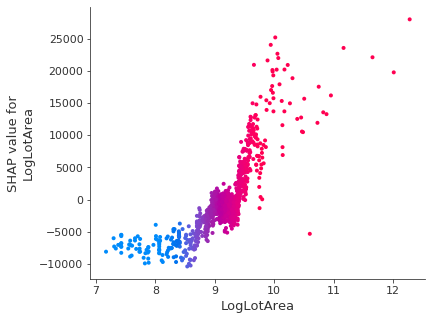

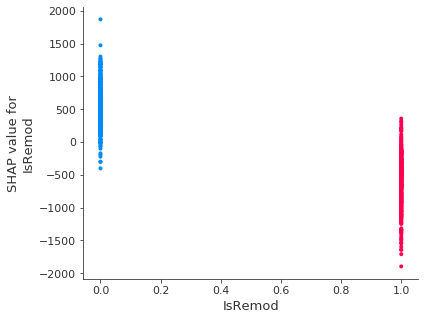

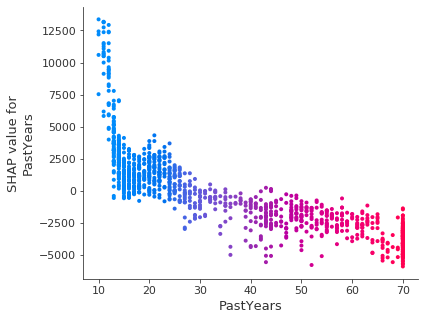

In [265]:
shap_tool.show_all_dependence_plot('regression')